In [3]:
# Libraries 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

GET THE DATA

In [2]:
# Load the fashion_mnist dataset
(ds1_images, ds1_labels), (ds2_images, ds2_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Create dictionaries to store the datasets
ds1_hozana = {'images': ds1_images[:60000], 'labels': ds1_labels[:60000]}
ds2_hozana = {'images': ds2_images[:10000], 'labels': ds2_labels[:10000]}


DATASET PRE-PROCESSING

In [12]:
#Normalize pixel values to range between -1 and 1
ds1_hozana['images'] = (ds1_hozana['images'].astype(np.float32) - 127.5) / 127.5
ds2_hozana['images'] = (ds2_hozana['images'].astype(np.float32) - 127.5) / 127.5


print("Shape of ds1_hozana['images']: ", ds1_hozana['images'].shape)
print("Shape of ds2_hozana['images']: ", ds2_hozana['images'].shape)

Shape of ds1_hozana['images']:  (60000, 28, 28)
Shape of ds2_hozana['images']:  (10000, 28, 28)


In [13]:
# Concatenate images datasets
ds1_pants_indices = np.where(ds1_hozana['labels'] == 1)[0]
ds2_pants_indices = np.where(ds2_hozana['labels'] == 1)[0]

ds1_pants_images = ds1_hozana['images'][ds1_pants_indices]
ds2_pants_images = ds2_hozana['images'][ds2_pants_indices]

dataset_hozana = np.concatenate([ds1_pants_images, ds2_pants_images])

# Step 4: Display shape of the concatenated dataset
print("Shape of dataset_hozana: ", dataset_hozana.shape)

Shape of dataset_hozana:  (7000, 28, 28)


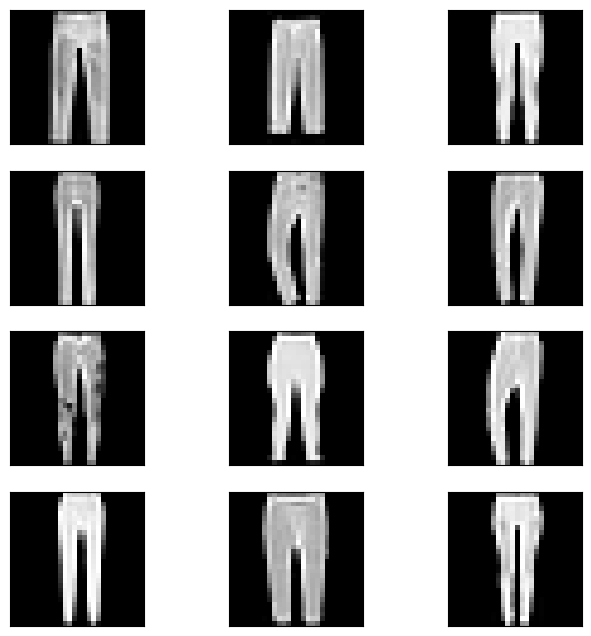

In [14]:
plt.figure(figsize=(8, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(dataset_hozana[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [15]:
# Create training dataset 
train_dataset_hozana = tf.data.Dataset.from_tensor_slices(dataset_hozana)
train_dataset_hozana = train_dataset_hozana.shuffle(buffer_size=dataset_hozana.shape[0]).batch(256)

GAN ARCHITECTURE

In [16]:
# Build the Generator Model
generator_model_hozana = tf.keras.Sequential([
    # Fully connected layer
    tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
    # Batch normalization
    tf.keras.layers.BatchNormalization(),
    # Leaky ReLU activation
    tf.keras.layers.LeakyReLU(),
    # Reshape to (7, 7, 256)
    tf.keras.layers.Reshape((7, 7, 256)),
    # Transposed Convolution Layer
    tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
    # Batch normalization
    tf.keras.layers.BatchNormalization(),
    # Leaky ReLU activation
    tf.keras.layers.LeakyReLU(),
    # Transposed Convolution Layer
    tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
    # Batch normalization
    tf.keras.layers.BatchNormalization(),
    # Leaky ReLU activation
    tf.keras.layers.LeakyReLU(),
    # Transposed Convolution Layer with tanh activation
    tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
])

# Display model summary
generator_model_hozana.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (Batch  (None, 12544)             50176     
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 7, 7, 128)         819200    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 128)        

In [17]:
from tensorflow.keras.utils import plot_model

# Generate a diagram illustrating the structure of the neural network model
plot_model(generator_model_hozana, to_file='generator_model_diagram.png', show_shapes=True, expand_nested=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
